# Simple Linear Regression

In [1]:
# import necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# import the dataset 
# https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
cols = [
    'YearsExperience',
    'Salary'
]
data = pd.read_csv('../Data/Salary_dataset.csv', usecols=cols)
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [4]:
# info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


There are no null values in this dataset.

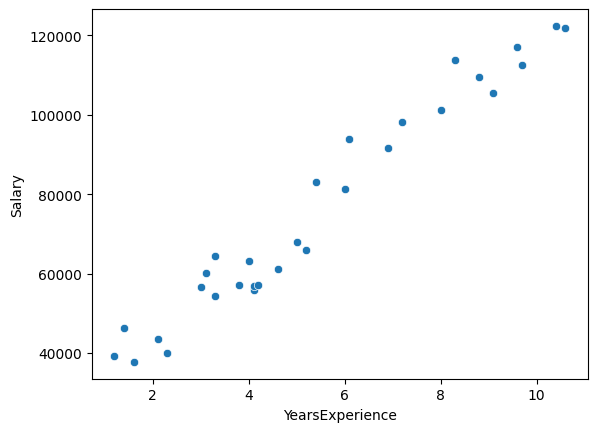

In [6]:
# let us view the scatter plot for this dataset
sns.scatterplot(data=data,
                x='YearsExperience',
                y='Salary')

plt.show()

The scatter plot suggests a linear relationship

In [41]:
# convert to numpy array
X = data.drop('Salary', axis=1).values
y = data['Salary']

In [42]:
# split the data into train and test set 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [70]:
X_train

array([[10.4],
       [ 8.8],
       [ 4.1],
       [ 1.2],
       [ 2.3],
       [ 5.2],
       [ 3. ],
       [ 4.2],
       [ 4.1],
       [ 8. ],
       [ 1.4],
       [ 1.6],
       [ 9.1],
       [ 2.1],
       [ 7.2],
       [ 9.6],
       [ 6. ],
       [10.6],
       [ 6.9],
       [ 3.3],
       [ 4. ],
       [ 4.6],
       [ 6.1],
       [ 3.1]])

In [61]:
# Feature Scaling - Standardization 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Column Transformer: Apply StandardScaler to numerical columns
ct = ColumnTransformer(transformers=[('num_scaler', StandardScaler(), [0])],
                       remainder='passthrough')

In [66]:
# train the simple linear regression model on train set 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# create an instance of the LinearRegression class 
regressor = LinearRegression(fit_intercept=True)

# create a pipeline 
pipeline = Pipeline([
    ('preprocessor', ct),
    ('regressor',regressor)
])

# fit the pipeline 
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  StandardScaler(), [0])])),
                ('regressor', LinearRegression())])

**Does pipeline.fit() Apply fit_transform() to the Train Set?**

- Yes! When you call `pipeline.fit(X_train, y_train)`, the `ColumnTransformer` (inside the `pipeline`) automatically applies `fit_transform()` to the train set.

🚀 How It Works Internally

1️⃣ `preprocessor.fit_transform(X_train)` is applied to X_train.

2️⃣ The transformed `X_train` is passed to the next step (e.g., `LinearRegression().fit()`).

3️⃣ When calling `pipeline.predict(X_test)`, only `transform(X_test)` (not `fit_transform`) is applied to ensure no data leakage.

In [74]:
# get the parameters of the model 
intercept = pipeline.named_steps['regressor'].intercept_
coef = pipeline.named_steps['regressor'].coef_

print(f'The intercept of the model is : {intercept} and the coeffecient is : {coef[0]}')
print(f'Model : Salary = {intercept} + {coef[0]}*YearsExperience')

The intercept of the model is : 74208.625 and the coeffecient is : 27151.537425833674
Model : Salary = 74208.625 + 27151.537425833674*YearsExperience


<Axes: ylabel='Salary'>

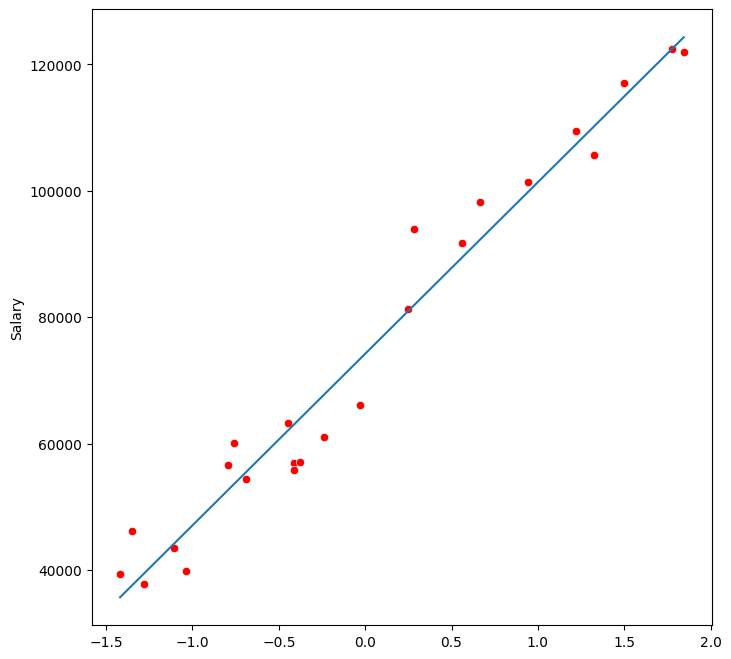

In [77]:
fig,ax = plt.subplots(figsize=(8,8))

# Get transformed features from the pipeline
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

sns.scatterplot(x=X_train_transformed.ravel(),
                y=y_train,
                ax=ax,
                color='red')

sns.lineplot(x=X_train_transformed.ravel(),
             y=intercept+coef*X_train_transformed.ravel(),
             ax=ax)


In [79]:
# Now we are predictng
y_predict = pipeline.predict(X_test)
y_predict

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

<Axes: ylabel='Salary'>

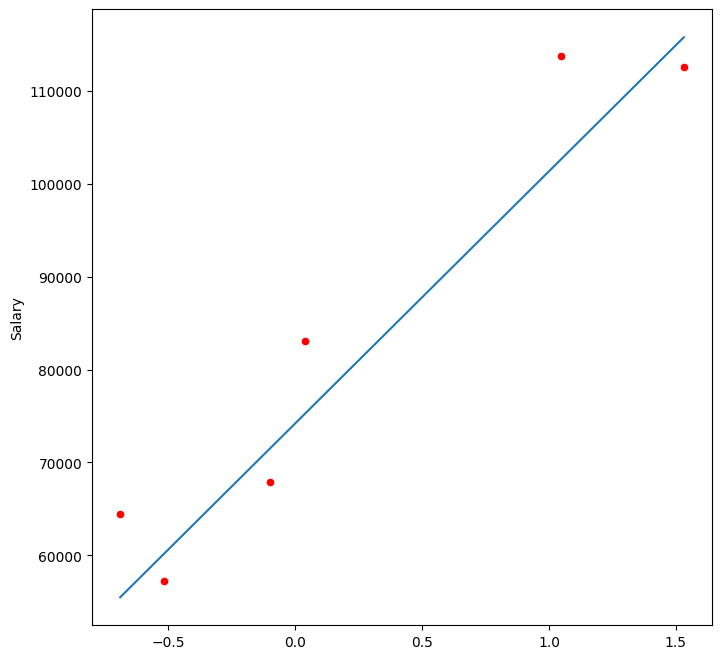

In [80]:
fig,ax = plt.subplots(figsize=(8,8))

sns.scatterplot(x=X_test_transformed.ravel(),
                y=y_test,
                ax=ax,
                color ='red')

sns.lineplot(x=X_test_transformed.ravel(),
             y=y_predict,
             ax=ax)


R² Score: 0.902
MSE: 49830096.856
RMSE: 7059.044
MAE: 6286.454


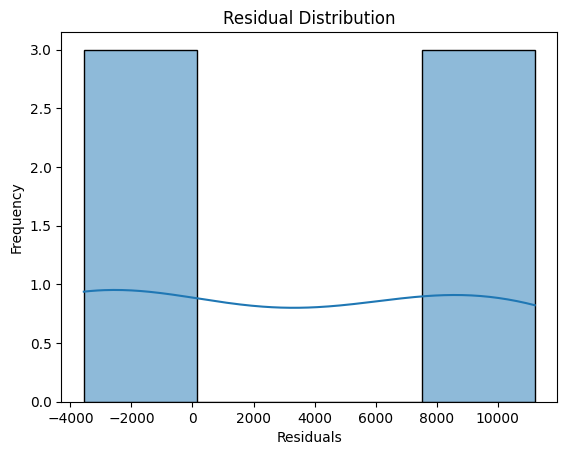

In [81]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the model
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Residual Plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()
